STAT 453: Deep Learning (Spring 2021)  

Instructor: Sebastian Raschka (sraschka@wisc.edu)  
Course website: http://pages.stat.wisc.edu/~sraschka/teaching/stat453-ss2021/  
GitHub repository: https://github.com/rasbt/stat453-deep-learning-ss21

In [1]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -v -p numpy

Sebastian Raschka 

CPython 3.8.2
IPython 7.18.1

numpy 1.18.5


# L03: Perceptron animation

## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Preparing a toy dataset

In [3]:
##########################
### DATASET
##########################

data = np.genfromtxt('perceptron_toydata.txt', delimiter='\t')
X, y = data[:, :2], data[:, 2]
y = y.astype(np.int)

print('Class label counts:', np.bincount(y))
print('X.shape:', X.shape)
print('y.shape:', y.shape)

# Shuffling & train/test split
shuffle_idx = np.arange(y.shape[0])
shuffle_rng = np.random.RandomState(123)
shuffle_rng.shuffle(shuffle_idx)
X, y = X[shuffle_idx], y[shuffle_idx]

Class label counts: [50 50]
X.shape: (100, 2)
y.shape: (100,)


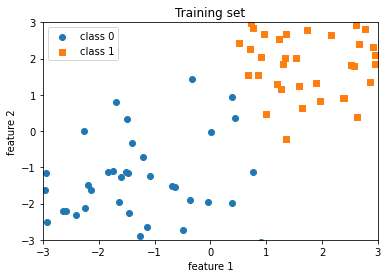

In [4]:
plt.scatter(X[y==0, 0], X[y==0, 1], label='class 0', marker='o')
plt.scatter(X[y==1, 0], X[y==1, 1], label='class 1', marker='s')
plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend()
plt.show()

## Defining the Perceptron model

In [5]:
class Perceptron():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = np.zeros((num_features, 1), dtype=np.float)
        self.bias = np.zeros(1, dtype=np.float)

    def forward(self, x):
        linear = np.dot(x, self.weights) + self.bias
        predictions = np.where(linear > 0., 1, 0)
        return predictions
        
    def backward(self, x, y):  
        predictions = self.forward(x)
        errors = y - predictions
        return errors
        
    def train(self, x, y, epochs):
        for e in range(epochs):
            
            for i in range(y.shape[0]):
                errors = self.backward(x[i].reshape(1, self.num_features), y[i]).reshape(-1)
                self.weights += (errors * x[i]).reshape(self.num_features, 1)
                self.bias += errors
                
    def evaluate(self, x, y):
        predictions = self.forward(x).reshape(-1)
        accuracy = np.sum(predictions == y) / y.shape[0]
        return accuracy

## Training the Perceptron

In [6]:
all_weights = []
all_biases = []

ppn = Perceptron(num_features=2)

acc = 0

for epoch in range(10):

    for i in range(X.shape[0]):
        
        all_weights.append(ppn.weights.copy())
        all_biases.append(ppn.bias.copy())
        ppn.train(X[i].reshape(1, -1), y[i].reshape(-1), epochs=1)
        
        acc = ppn.evaluate(X, y)
        
        if acc == 1.0:
            break
            
    if acc == 1.0:
        all_weights.append(ppn.weights.copy())
        all_biases.append(ppn.bias.copy())
        break

## Plotting the boundary

<ipython-input-7-ef61daa0e006>:22: RuntimeWarning: invalid value encountered in true_divide
  y_min = ( (-(w[0] * x_min) - b[0])
<ipython-input-7-ef61daa0e006>:26: RuntimeWarning: invalid value encountered in true_divide
  y_max = ( (-(w[0] * x_max) - b[0])
<ipython-input-7-ef61daa0e006>:39: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  ax.scatter(X[i][0], X[i][1], **scatter_highlight_defaults)
<ipython-input-7-ef61daa0e006>:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


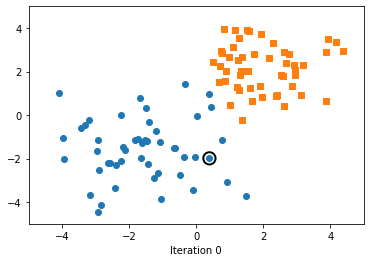

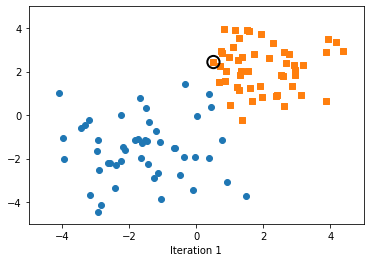

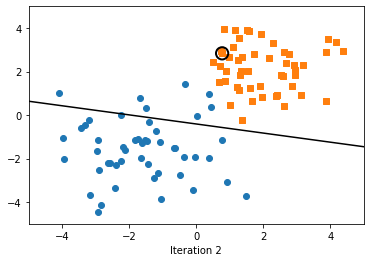

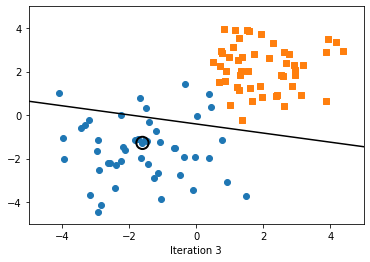

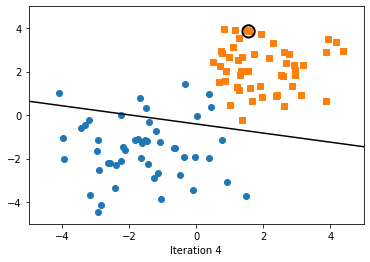

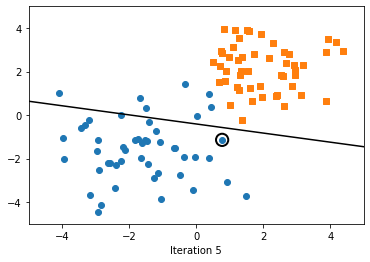

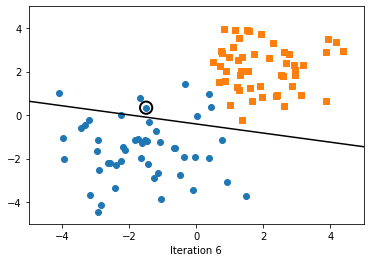

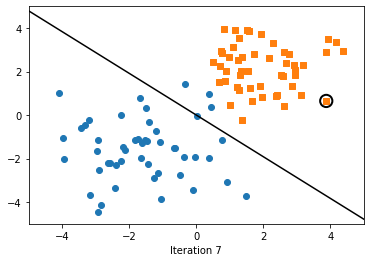

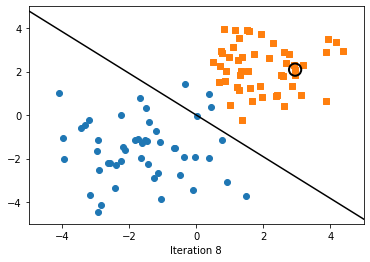

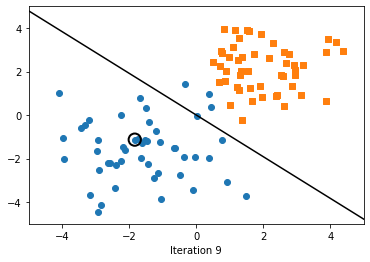

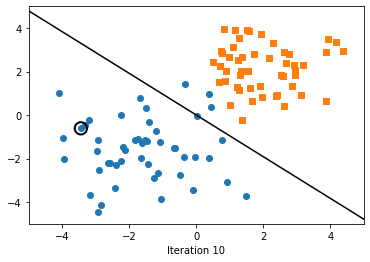

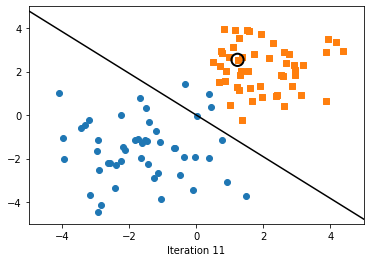

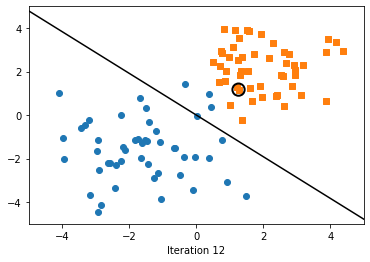

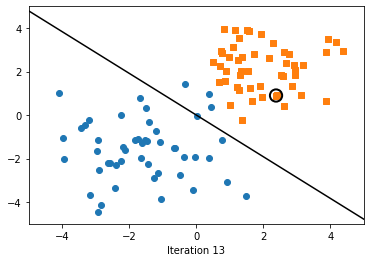

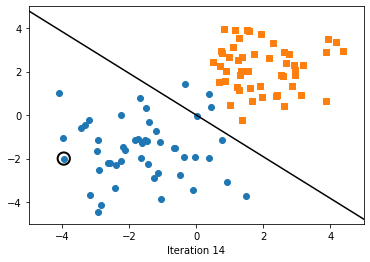

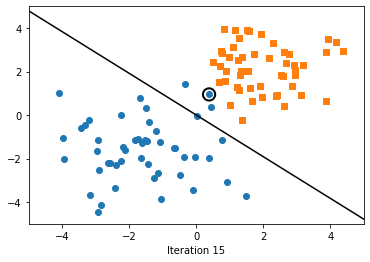

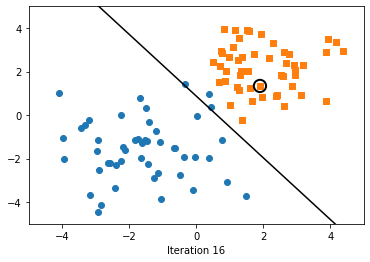

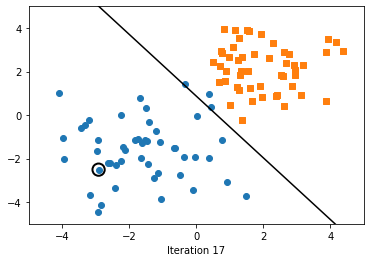

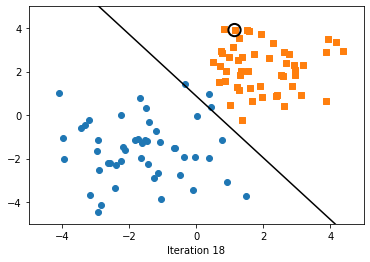

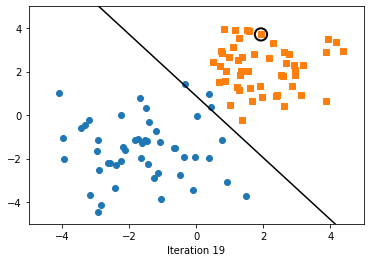

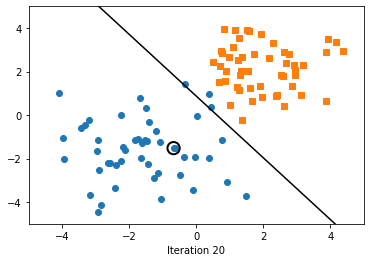

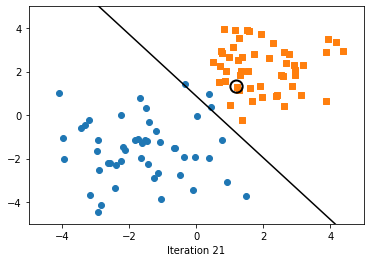

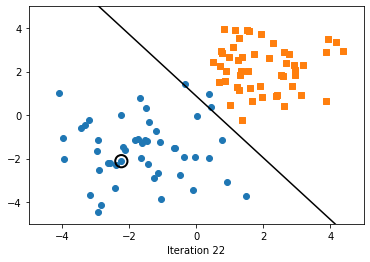

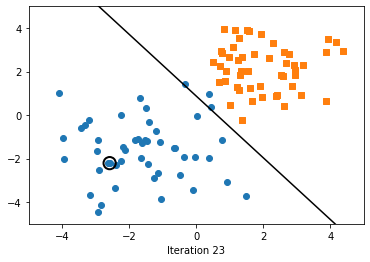

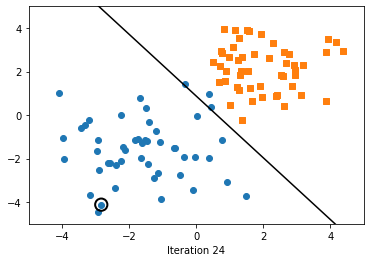

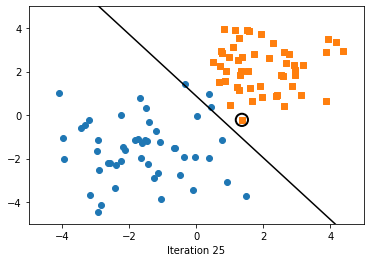

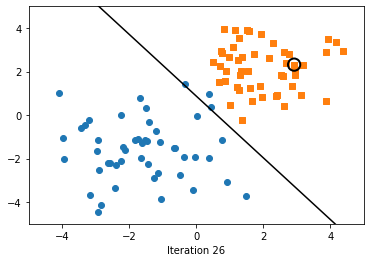

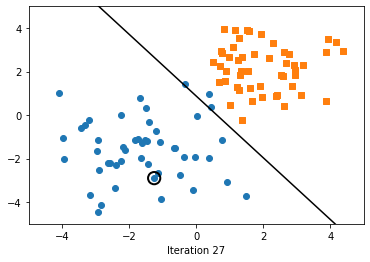

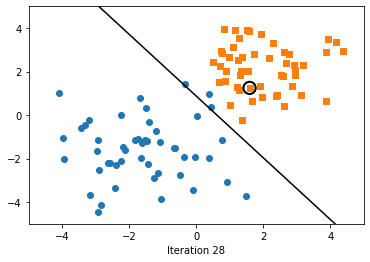

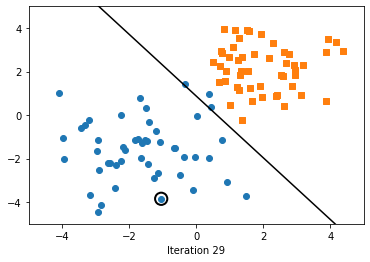

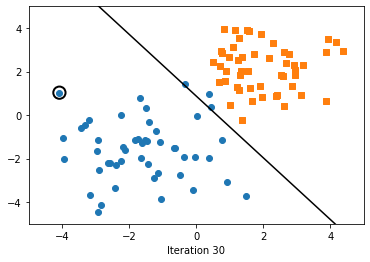

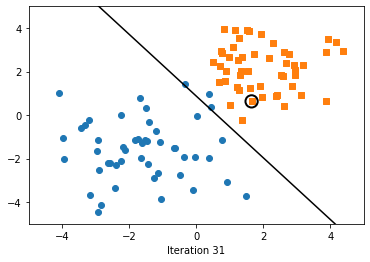

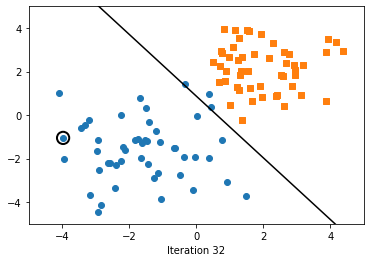

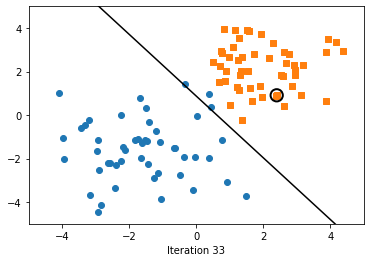

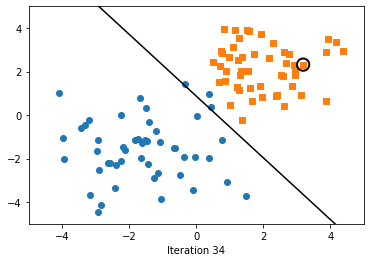

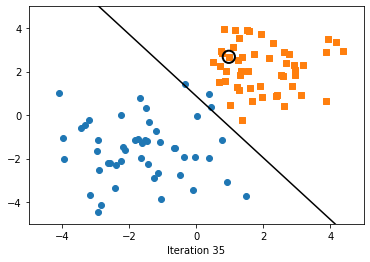

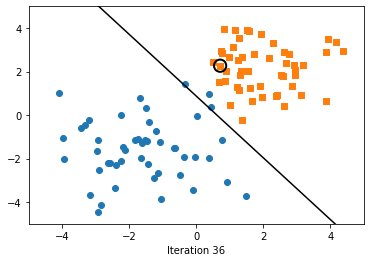

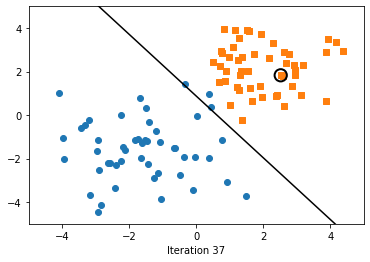

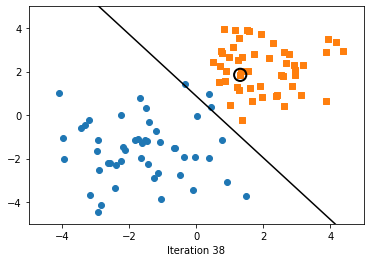

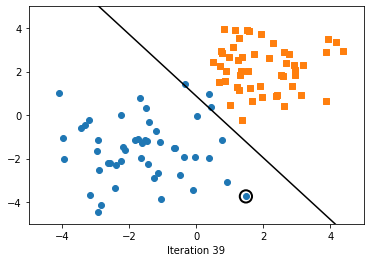

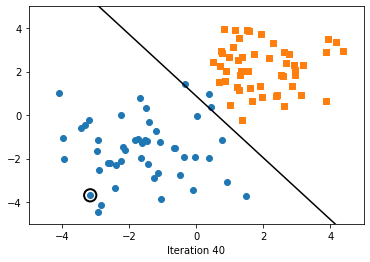

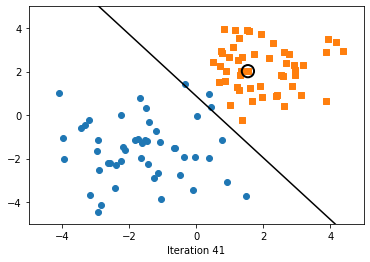

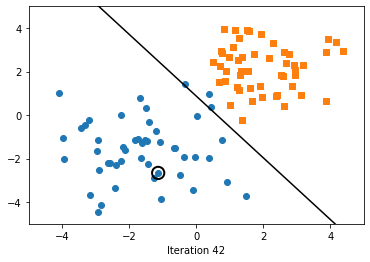

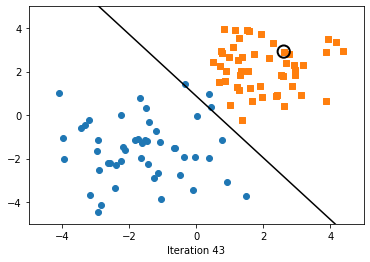

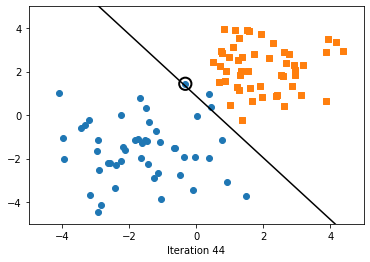

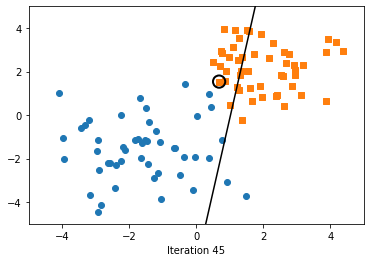

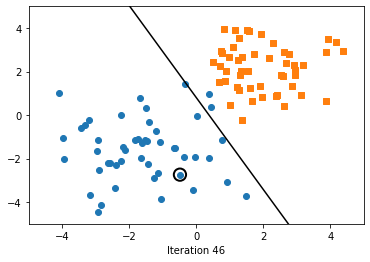

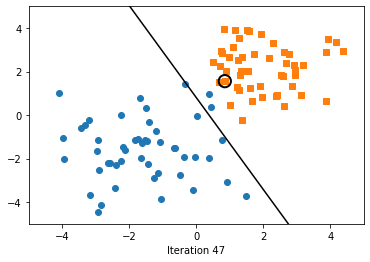

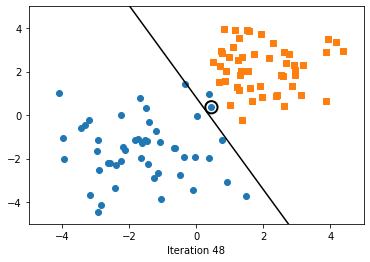

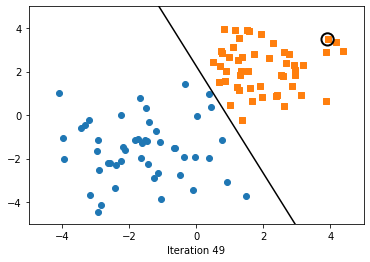

In [7]:
##########################
### 2D Decision Boundary
##########################


import imageio


scatter_highlight_defaults = {'c': '',
                              'edgecolor': 'k',
                              'alpha': 1.0,
                              'linewidths': 2,
                              'marker': 'o',
                              's': 150}

def plot(i):
    
    fig, ax = plt.subplots()
    w, b = all_weights[i], all_biases[i]
    
    x_min = -20
    y_min = ( (-(w[0] * x_min) - b[0]) 
              / w[1] )

    x_max = 20
    y_max = ( (-(w[0] * x_max) - b[0]) 
              / w[1] )
    
    ax.set_xlim([-5., 5])
    ax.set_ylim([-5., 5])
    
    ax.set_xlabel('Iteration %d' % i)

    ax.plot([x_min, x_max], [y_min, y_max], color='k')
    
    ax.scatter(X[y==0, 0], X[y==0, 1], label='class 0', marker='o')
    ax.scatter(X[y==1, 0], X[y==1, 1], label='class 1', marker='s')
    
    ax.scatter(X[i][0], X[i][1], **scatter_highlight_defaults)

    fig.canvas.draw();
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    return image


kwargs_write = {'fps':1.0, 'quantizer':'nq'}
imageio.mimsave('training.gif', [plot(i) for i in range(len(all_weights))], fps=1);
